# Opioid Addiction Project
## Notebook 03: Feature Selection

This notebook does a few things:

1. Removes most of the features (columns), keeping only those which are used in the model
2. Performs preprocessing on the features as needed, including:
  * Re-coding features
  * Bin values as needed
  * One-hot encodes categorical features
  * Scaling and centering continuous features  

### W210, Capstone
Summer 2019

Team:  Cameron Kennedy, Aditi Khullar, Rachel Kramer, Sharad Varadarajan

# 0. Load Libraries and Set Global Variables
This analysis is performed in the cells below.

In [1]:
#Import Required Libraries
import numpy as np
import pandas as pd
import re

#Custom data prep function used in both training and prediction 
import OpioidDataPrep as odp

#Set initial parameter(s)
pd.set_option('display.max_rows', 200)
pd.options.display.max_columns = 150
dataDir = './data/'

print('Pandas Version', pd.__version__)

Pandas Version 0.24.1


# 1. Load Data

This step loads the data from the file `misuse.pickle.zip`.

In [2]:
#Load Data
df = pd.read_pickle(dataDir+'misuse.pickle.zip')
df

AALTMDE  ABODALC  ABODCOC  ABODHER  ABODMRJ  ABPYILANAL  ABPYILLALC  \
19          NaN        0        0        0        0           0           0   
20          0.0        1        0        0        0           0           1   
21          NaN        0        0        0        0           0           0   
23          NaN        0        0        0        0           0           0   
33          NaN        0        0        0        0           0           0   
34          NaN        0        0        0        0           0           0   
36          NaN        0        0        0        0           0           0   
46          NaN        0        0        0        0           0           0   
50          NaN        0        0        0        0           0           0   
52          NaN        0        0        0        0           0           0   
54          0.0        1        0        0        0           0           1   
58          NaN        1        0        0        0           0           0   
66          NaN        1        0        0        0           0           1   
76          NaN        0        0        0        0           0           0   
78          NaN        0        0        0        0           0           0   
81          NaN        0        0        0        0           0           0   
85          0.0        0        0        0        0           0           0   
90          NaN        0        0        0        0           0           0   
96          NaN        1        0        0        1           0           0   
97          NaN        0        0        0        0           0           0   
103         NaN        0        0        1        0           0           0   
104         NaN        0        0        0        0           0           0   
108         NaN        0        0        0        0           0           0   
114         0.0        0        0        0        0           0           0   
115         NaN        0        0        0        0           0           0   
117         NaN        0        0        0        0           0           0   
123         0.0        0        0        0        0           0           0   
124         NaN        0        0        0        0           0           0   
126         NaN        0        0        0        0           0           0   
130         0.0        0        0        0        0           0           0   
131         NaN        0        0        0        0           0           0   
134         NaN        0        0        0        0           0           0   
135         NaN        0        0        0        0           0           0   
138         NaN        0        0        0        0           0           0   
140         NaN        0        0        0        0           0           0   
142         NaN        0        0        0        0           0           0   
146         NaN        0        0        0        0           0           0   
150         NaN        0        0        0        0           0           0   
151         0.0        0        0        0        0           0           0   
153         NaN        0        0        0        0           0           0   
165         0.0        0        0        0        0           0           0   
169         1.0        0        0        1        0           0           0   
171         NaN        0        0        0        0           0           0   
173         NaN        0        0        0        0           0           0   
180         NaN        0        0        0        0           0           0   
182         NaN        0        0        0        0           0           0   
183         NaN        0        0        0        0           0           0   
188         NaN        0        0        0        0           0           0   
193         NaN        0        0        0        0           0           0   
200         NaN        0        0        0        0       

# 2. Feature Selection

Here we'll keep only the features we want in our final model.

In addition to our feature selection, we'll also tag each variable with the types of preprocessing required for each one individually. Tagging them here helps ensure they don't make it to the model without having first been preprocessed.

In [3]:
# #Column finder
odp.colFinder(df, 'DRV')

['BKDRVINF']


In [4]:
#List of variables to keep, along with a quick description and proessing strategy
colsToKeep = [#DEMOGRAPHICS
              'IRSEX', #(Gender):  Subtract 1 from this field to make it 0=Male, 1=Female
              #'IREDUHIGHST2', #(Highest Education) - Removed in favor of EDUHIGHCAT
              'EDUHIGHCAT', #(Highest Education)
              'AGE2', #(Age): Scale and center
    
              #ALCOHOL
              'IRALCRC', #(Alcohol Recency): Straight One Hot
              'IRALCFY', #(Alcohol Frequency Past Year):  Bin
              'CABINGEVR', #(Ever binge drank):  Recode then bin
              'IRALCAGE', #(First time used alcohol): Bin

              #DRUGS + ALCOHOL
              'TXYRRECVD2', #(Ever alcohol/drug treatment, past yr): No action required (already binary, 0 and 1)
              'TXEVRRCVD2', #(Ever alcohol/drug treatment, lifetime): No action required (already binary, 0 and 1)

              #'DRVINALCO2', #Not found in data
              #TOBACCO
              'IRCIGRC', #(Tobacco Recency, incl. Never):  Straight One Hot
              #'CIGDLYMO', #(Tobacco 30+ consecutive days):  Straight One Hot
              'CIGAGE', #(Tobacco Use Daily):  Bin
              'TOBYR', #(Used any tobacco product in past year (cigar, cigarette, etc.))
              'FUCIG18', #(Used cigarettes before 18): Subtract 1
              
              #WEED
              'IRMJRC', #(Weed recency): Straight One Hot
              'IRMJFY', #(Weed days in past year):  Bin
              'FUMJ18', #(First used weed prior to age 18): Subtract 1
    
              #Hard Drugs
              'IRCOCRC', #(Cocaine recency):  Straight One Hot
              'IRCRKRC', #(Crack recency):  Straight One Hot
              'IRHERRC', #(Heroine recency):  Straight One Hot
              'IRHALLUCREC', #(Hallucinogen recency):  Straight One Hot    
              'IRLSDRC', #(LSD recency):  Straight One Hot
              'IRECSTMOREC', #(Ecstacy recency):  Straight One Hot
              'IRINHALREC', #(Inhalant recency):  Straight One Hot
              'IRMETHAMREC', #(Meth recency):  Straight One Hot

              #DEPRESSION
              'ADDPREV', #(Several days of depression): One Hot
              'ADDSCEV', #(Several days of discouraged about life): One Hot
    
              ##OTHER
              'BOOKED', #(Ever arrested & booked): Recode + One Hot
                      
              #OUTCOME VARIABLE    
              'MISUSE',
             ]

df = df[colsToKeep] #Use colsToKeep.keys() if using dictionary method
df = odp.sortDFbyColName(df) #Then sort the data by column
df

ADDPREV  ADDSCEV  AGE2  BOOKED  CABINGEVR  CIGAGE  EDUHIGHCAT  \
19           99       99     4       2         91     991           5   
20            1       99    11       2          1      16           1   
21            2        2    12       2          2     999           3   
23            2        2     8       2          2     991           3   
33            2        2    11       1          5     991           2   
34            2        2     9       2          5     999           3   
36            2        1    17       2          1      18           1   
46            2        2     8       2          2     991           2   
50            2        2    15       1          5     991           3   
52           99       99     4       2         91     991           5   
54            1       99    16       2          5      16           2   
58            2        2    11       2          5     999           4   
66            2        2    13       2          5      13           4   
76            2        2    15       2          2      15           1   
78            1       99    15       1          1      16           3   
81           99       99     2       1         91     991           5   
85            1       99    15       2          1     999           4   
90            2        2     7       2         91     991           2   
96            2        2     9       1          1     999           2   
97            2        2    15       1          1     991           2   
103           2        2    11       2          5      17           3   
104           2        2    15       2         91     991           3   
108           2        2    15       2          5      20           2   
114           1       99    15       2          2     991           4   
115          99       99     4       2          1     991           5   
117           2        2    16       2         91     991           1   
123           1       99    15       2          2      17           3   
124           2        2    14       2         91     999           4   
126           2        1    14       2          1     999           3   
130           1       99    12       2          2     999           3   
131           2        2    16       2         91      39           1   
134           1       99    15       1          1      13           2   
135           1       99     7       2         91     991           1   
138           1       99    15       2          1      15           2   
140           2        2    16       2          2     991           4   
142           2        2    15       2          1      18           3   
146           2        2     7       2         91     991           1   
150           1       99    14       1          1      16           3   
151           1       99    16       1          1      15           2   
153           2        2    15       1          5      18           4   
165           1       99    16       2          5      18           4   
169           1       99    16       2          1      35           3   
171           2        2     7       2          1     999           2   
173           2        2     7       2         91     999           1   
180           2        2    14       2          2     999           4   
182          99       99     2       2         91     991           5   
183           2        2    15       2          1     991           4   
188           2        2    17       2          2      20           3   
193           2        2    12       2          5     999           4   
200           2        2    16       2          2     999           3   
204           2        2    13       1          5     999           4   
213          99       99     4       2          5     999           5   
217           2        2    17       2          2      20           3   
218           1       99     8       2          2     991         

In [5]:
# #COMMENT OUT, BUT DON'T DELETE - USED TO GENERATE MANUAL MEANs and STDs

# #First need to recode (manually)
# IREDUHIGHST2 = {1:5.0, 2:6.0, 3:7.0, 4:8.0, 5:9.0, 6:10.0, 7:11.0, 8:12.0, 9:14.0, 10:15.0, 11:16.0}
# AGE2 = {1:12.0, 2:13.0, 3:14.0, 4:15.0, 5:16.0, 6:17.0, 7:18.0, 8:19.0, 9:20.0, 10:21.0,
#         11:np.mean([22,23]), 12:np.mean([24,25]), 13:np.mean([26,29]), 14:np.mean([30,34]),
#         15:np.mean([35,49]), 16:np.mean([50,64]), 17:70.0
#        }

# odp.prepRecode(df, 'AGE2', AGE2)
# odp.prepRecode(df, 'IREDUHIGHST2', IREDUHIGHST2)

# meanAGE2 = np.mean(df['AGE2'])
# meanIREDUHIGHST2 = np.mean(df['IREDUHIGHST2'])
# stdAGE2 = np.std(df['AGE2'])
# stdIREDUHIGHST2 = np.std(df['IREDUHIGHST2'])

# print(meanAGE2) #34.442670265002434
# print(meanIREDUHIGHST2) #12.759511226057949
# print(stdAGE2) #16.35478216502389
# print(stdIREDUHIGHST2) #2.6718811981473394


In [6]:
#Just a quick function to get counts. Not needed for final solution.
df['BOOKED'].value_counts()

2     41879
1     10870
3       403
97      133
94       54
98       17
85        2
Name: BOOKED, dtype: int64

# 3. Feature Preprocessing

We're doing all of this work in the OpioidDataPrep.py file.

In [7]:
df = odp.preprocess(df)
df = odp.sortDFbyColName(df) #Then sort the data by column
df

ADDPREV__GT1LTET2  ADDPREV__GT85LTET94  ADDPREV__GT94LTET97  \
19                      1                    0                    0   
20                      0                    0                    0   
21                      1                    0                    0   
23                      1                    0                    0   
33                      1                    0                    0   
34                      1                    0                    0   
36                      1                    0                    0   
46                      1                    0                    0   
50                      1                    0                    0   
52                      1                    0                    0   
54                      0                    0                    0   
58                      1                    0                    0   
66                      1                    0                    0   
76                      1                    0                    0   
78                      0                    0                    0   
81                      1                    0                    0   
85                      0                    0                    0   
90                      1                    0                    0   
96                      1                    0                    0   
97                      1                    0                    0   
103                     1                    0                    0   
104                     1                    0                    0   
108                     1                    0                    0   
114                     0                    0                    0   
115                     1                    0                    0   
117                     1                    0                    0   
123                     0                    0                    0   
124                     1                    0                    0   
126                     1                    0                    0   
130                     0                    0                    0   
131                     1                    0                    0   
134                     0                    0                    0   
135                     0                    0                    0   
138                     0                    0                    0   
140                     1                    0                    0   
142                     1                    0                    0   
146                     1                    0                    0   
150                     0                    0                    0   
151                     0                    0                    0   
153                     1                    0                    0   
165                     0                    0                    0   
169                     0                    0                    0   
171                     1                    0                    0   
173                     1                    0                    0   
180                     1                    0                    0   
182                     1                    0                    0   
183                     1                    0                    0   
188                     1                    0                    0   
193                     1                    0                    0   
200                     1                    0                    0   
204                     1                    0                    0   
213                     1                    0                    0   
217                     1                    0                    0   
218                     0                    0                    0   
219                     1                    0                    0   
223                     1       

In [8]:
### DO NOT SET fakeGreatPredictor = True FOR ACTUAL MODEL DEVELOPMENT ###
'''This cell createS a close-to-perfect predictor of our outcome variable MISUSE.
It copies MISUSE into a new column, M2, and then randomly changes a few rows.
Making this great predictor allows testing of the subsequent model to ensure
it is training properly.
'''
fakeGreatPredictor = False

if fakeGreatPredictor:
    df['M2'] = df['MISUSE'] #Create PERFECT predictor called M2

    dfLen = len(df)
    
    dfupdate=df.sample(int(dfLen*0.1)) #Randomly change 10% of rows to 0
    dfupdate.M2=0
    df.update(dfupdate)
    
    dfupdate=df.sample(int(dfLen*0.1)) #Randomly change 10% of rows to 1
    dfupdate.M2=1
    df.update(dfupdate)    

df

ADDPREV__GT1LTET2  ADDPREV__GT85LTET94  ADDPREV__GT94LTET97  \
19                      1                    0                    0   
20                      0                    0                    0   
21                      1                    0                    0   
23                      1                    0                    0   
33                      1                    0                    0   
34                      1                    0                    0   
36                      1                    0                    0   
46                      1                    0                    0   
50                      1                    0                    0   
52                      1                    0                    0   
54                      0                    0                    0   
58                      1                    0                    0   
66                      1                    0                    0   
76                      1                    0                    0   
78                      0                    0                    0   
81                      1                    0                    0   
85                      0                    0                    0   
90                      1                    0                    0   
96                      1                    0                    0   
97                      1                    0                    0   
103                     1                    0                    0   
104                     1                    0                    0   
108                     1                    0                    0   
114                     0                    0                    0   
115                     1                    0                    0   
117                     1                    0                    0   
123                     0                    0                    0   
124                     1                    0                    0   
126                     1                    0                    0   
130                     0                    0                    0   
131                     1                    0                    0   
134                     0                    0                    0   
135                     0                    0                    0   
138                     0                    0                    0   
140                     1                    0                    0   
142                     1                    0                    0   
146                     1                    0                    0   
150                     0                    0                    0   
151                     0                    0                    0   
153                     1                    0                    0   
165                     0                    0                    0   
169                     0                    0                    0   
171                     1                    0                    0   
173                     1                    0                    0   
180                     1                    0                    0   
182                     1                    0                    0   
183                     1                    0                    0   
188                     1                    0                    0   
193                     1                    0                    0   
200                     1                    0                    0   
204                     1                    0                    0   
213                     1                    0                    0   
217                     1                    0                    0   
218                     0                    0                    0   
219                     1                    0                    0   
223                     1       

# 4. Save to Pickle

In [9]:
#Save to pickle, for loading in the modeling (training) file
df.to_pickle(dataDir+'features.pickle.zip')
'''Note, the .to_pickle command INFERS zip compression based on the '.zip'
extension. Changing the extension will result in a 1GB file instead of a 
compressed file.
''';

#Also save as csv
df.to_csv(dataDir+'features.csv')

# 5. EDA Research

This section is just a bit of exploration on the data. It's not needed for the final product.

In [10]:
import matplotlib.pyplot as plt

C:\Users\camke\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:203: UserWarning: When passing multiple axes, layout keyword is ignored
  "ignored", UserWarning)


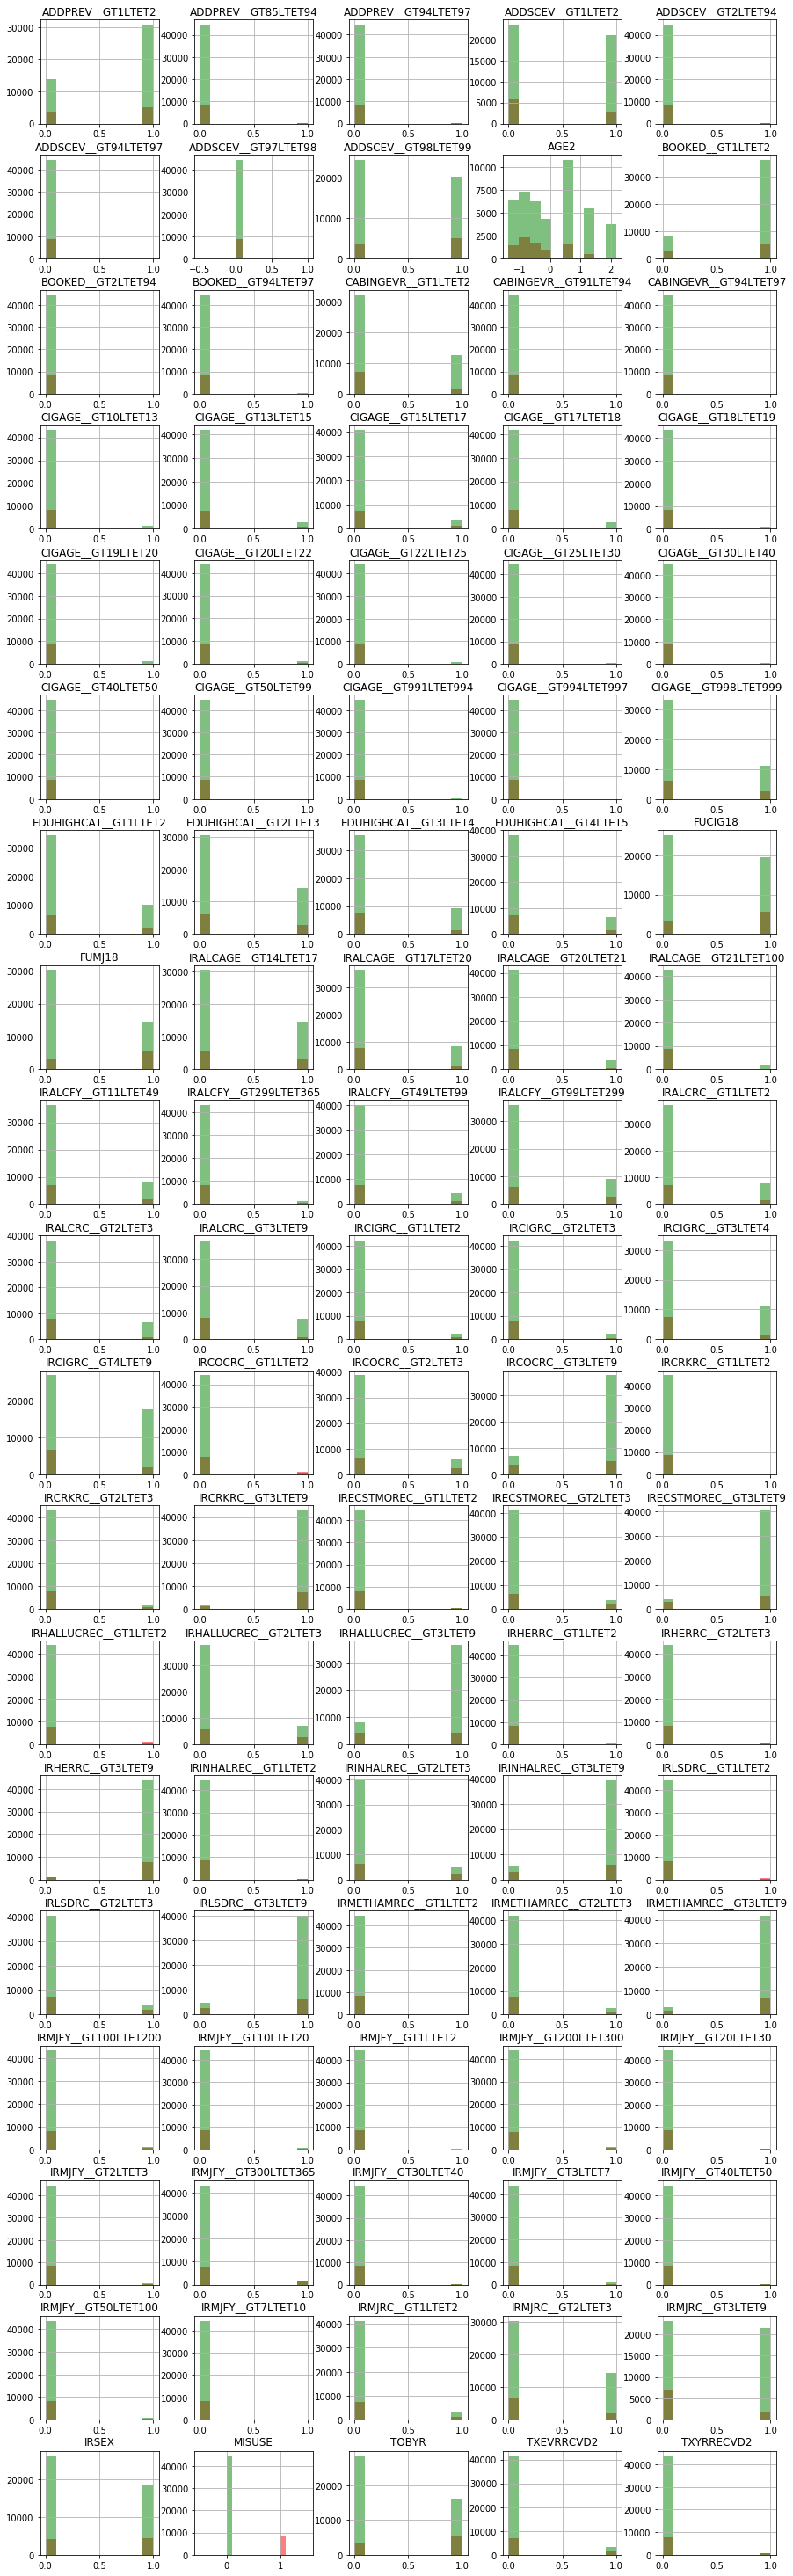

In [11]:
axes = df[df['MISUSE']==1].hist(layout=(25,5), alpha=0.5, 
                                figsize = (15,70), color='r')
df[df['MISUSE']==0].hist(ax=axes.ravel()[:len(df.columns)], 
                         layout=(25,5), alpha=0.5, color='g', figsize = (15,70))
plt.show()

## 5.1 Correlation Matrix

The correlationm matrix and associated calculations below it were used to find and eliminate features that were perfectly or nearly perfectly multicollinear, as well as features that had no variance (had only 1 value).

The absense of "fully yellow" or "fully blue" dots in the correlation matrix, other than along the diagonal, indicates we have thwarted the multicollinearity issue.

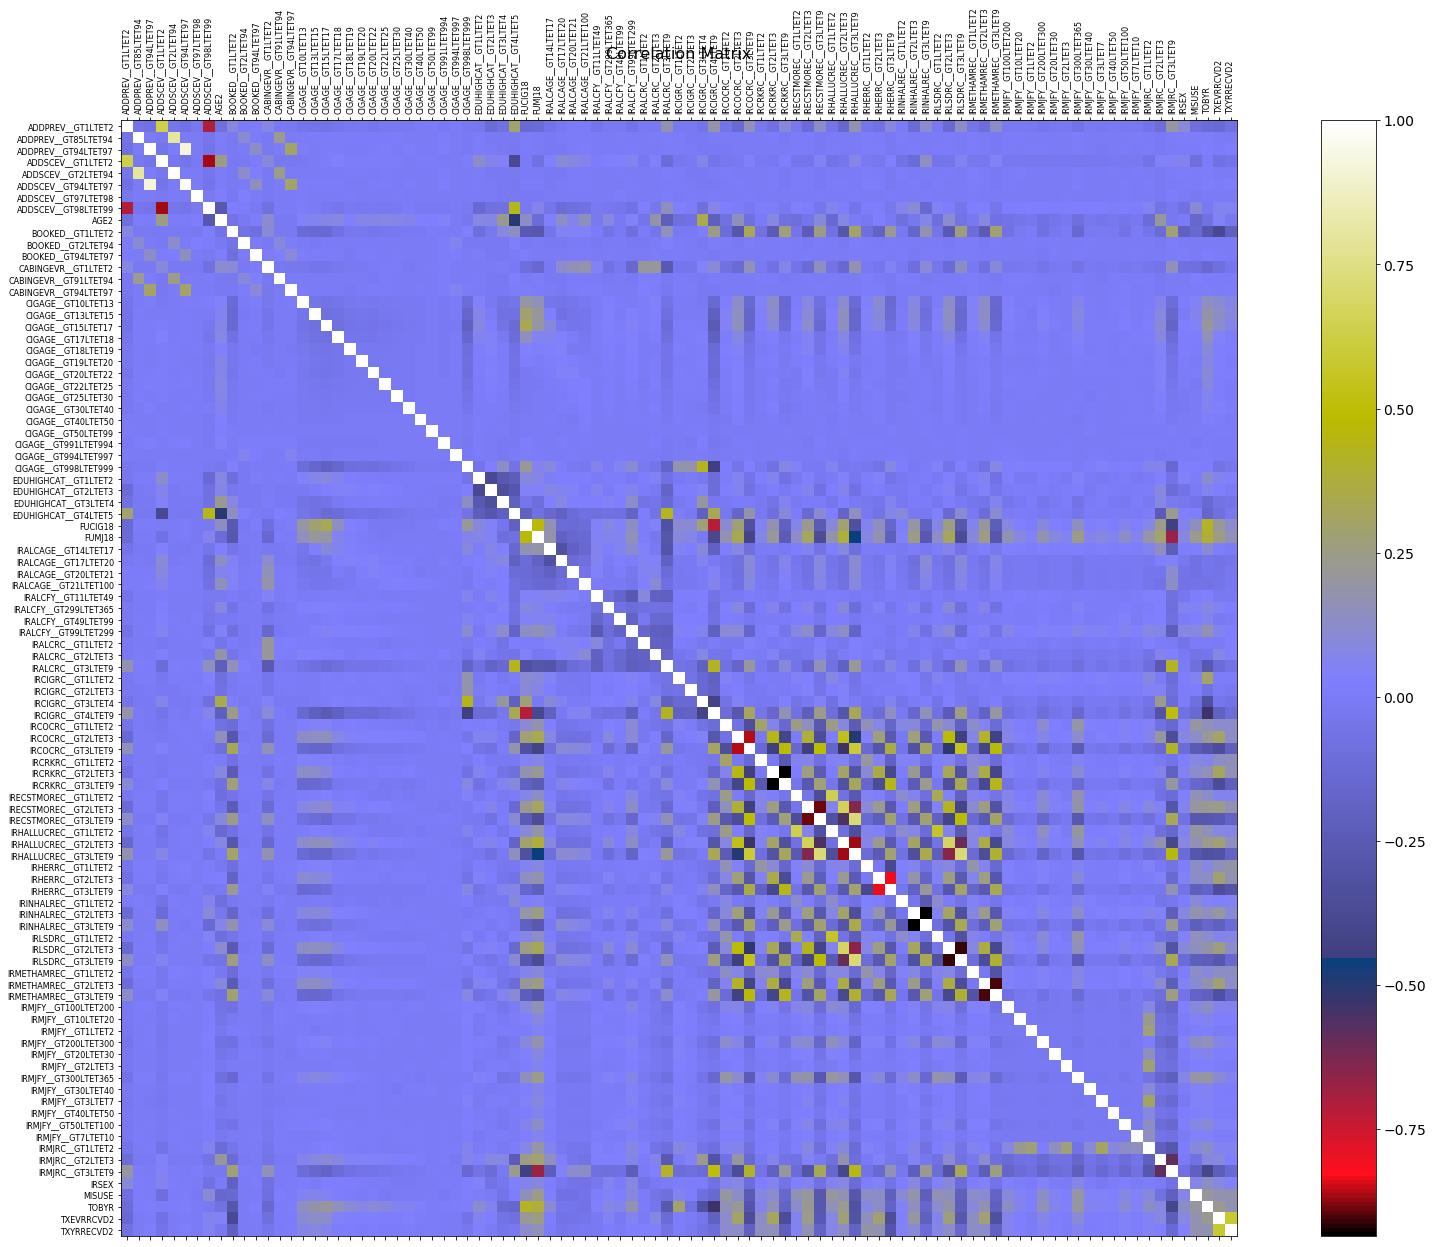

In [12]:
#Correlation Matrix
f = plt.figure(figsize=(30, 20))
plt.matshow(df.corr(), fignum=f.number, cmap=plt.cm.gist_stern)
plt.xticks(range(df.shape[1]), df.columns, fontsize=8, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [13]:
#Get features with < 10 positive responses, and remove those
#This eliminates 'near perfect' multicollinearity
colSums = df.sum(axis=0).astype(int)  #Sum all columns
colSumsGT0LTET10 = colSums[(colSums <= 10) & (colSums > 0)]  #Get >0, <=10

for col in colSumsGT0LTET10.keys():
    print(col)
    #Remove rows with this data (where == 1)
    
    #Drop these columns

print()
print(colSums.sort_values())

'''Here, anything with a really low value (< 5, or < 10, perhaps?) is a strong candidate for
a highly collinear feature.
''';


AGE2                         0
CIGAGE__GT50LTET99          12
CIGAGE__GT994LTET997        21
ADDSCEV__GT97LTET98         24
BOOKED__GT2LTET94           56
CIGAGE__GT40LTET50          63
ADDSCEV__GT2LTET94          79
ADDPREV__GT85LTET94         86
CIGAGE__GT991LTET994        87
CABINGEVR__GT91LTET94       87
BOOKED__GT94LTET97         133
CABINGEVR__GT94LTET97      133
ADDSCEV__GT94LTET97        165
ADDPREV__GT94LTET97        173
IRCRKRC__GT1LTET2          219
CIGAGE__GT30LTET40         284
IRHERRC__GT1LTET2          319
IRMJFY__GT40LTET50         343
IRMJFY__GT7LTET10          391
IRMJFY__GT30LTET40         419
IRMETHAMREC__GT1LTET2      471
CIGAGE__GT25LTET30         518
IRMJFY__GT2LTET3           578
IRMJFY__GT1LTET2           610
IRINHALREC__GT1LTET2       613
IRMJFY__GT20LTET30         739
IRLSDRC__GT1LTET2          835
IRMJFY__GT10LTET20         861
CIGAGE__GT22LTET25         927
IRECSTMOREC__GT1LTET2     1028
IRMJFY__GT3LTET7          1140
CIGAGE__GT19LTET20        1187
IRMJFY_